In [7]:
from sklearn.datasets import load_iris
iris=load_iris()

In [10]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()
y = pd.Series(iris.target)

In [11]:
df = X.copy()
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Count')

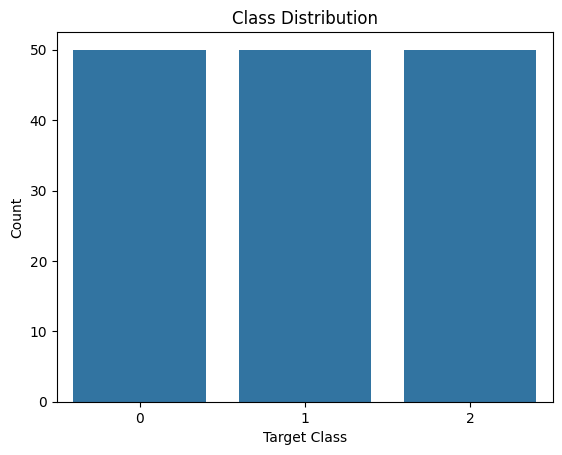

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['target'])

plt.title("Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")

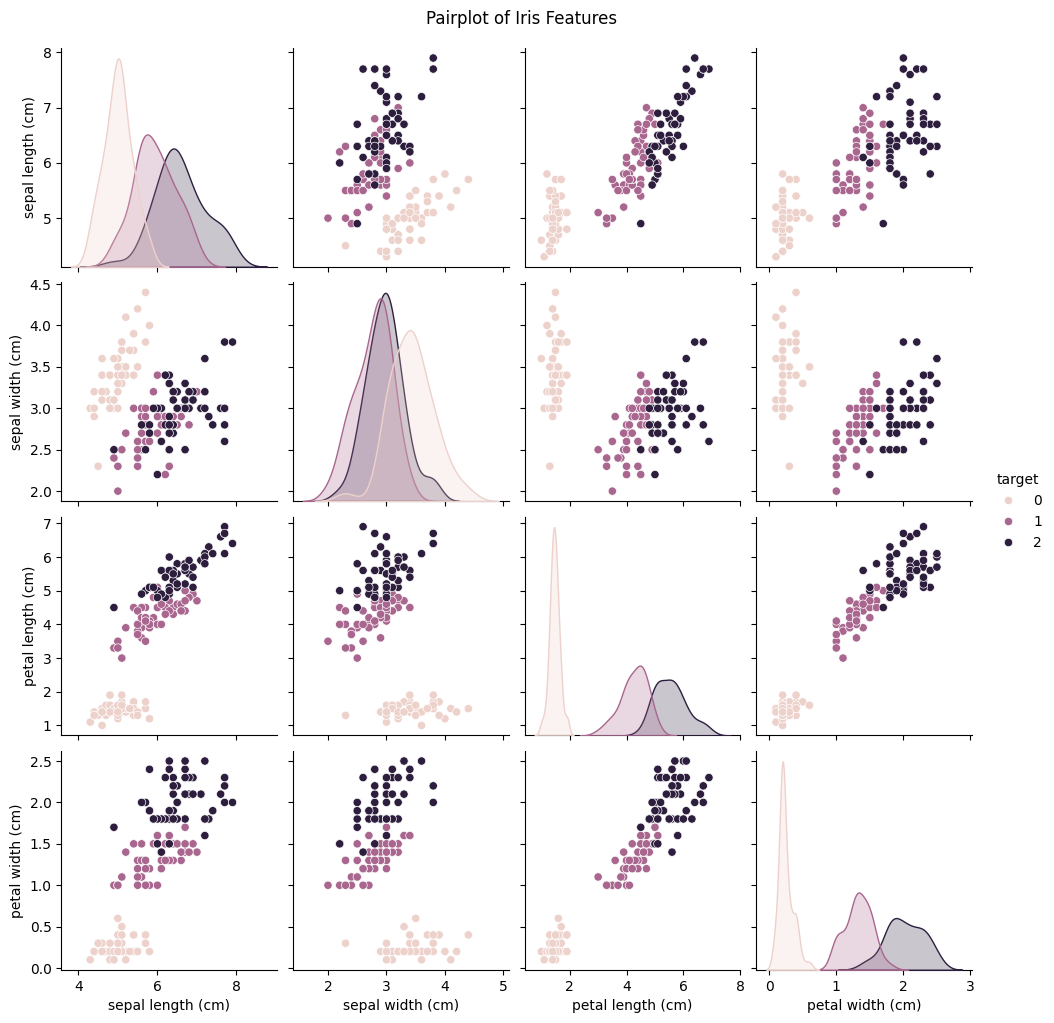

In [14]:
sns.pairplot(df, hue='target')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


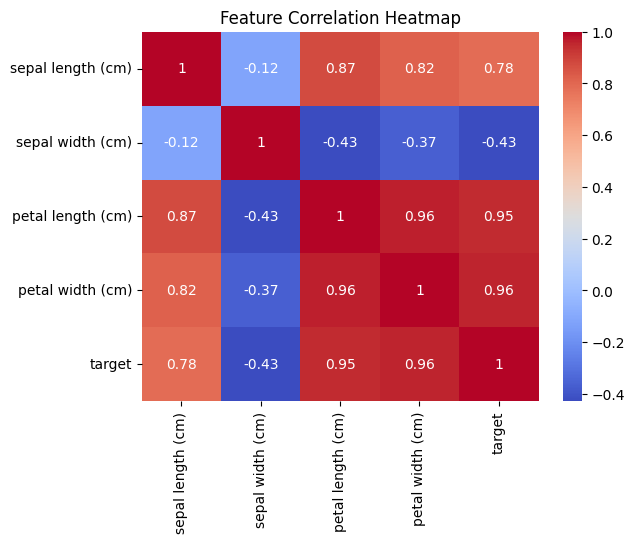

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

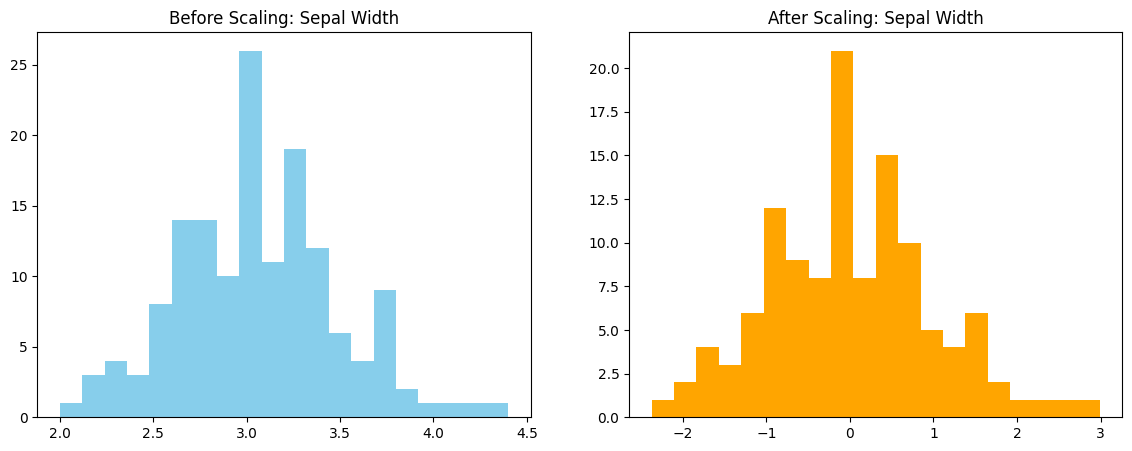

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(X.iloc[:, 1], bins=20, color="skyblue")
ax[0].set_title("Before Scaling: Sepal Width")

ax[1].hist(X_train[:, 1], bins=20, color="orange")
ax[1].set_title("After Scaling: Sepal Width")
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

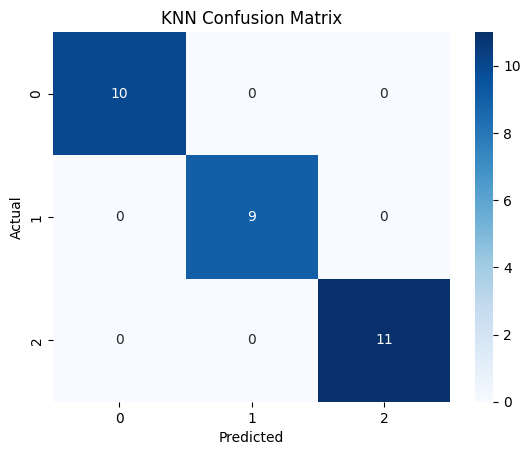

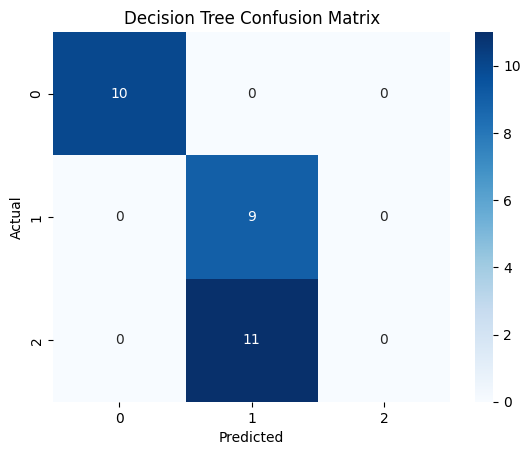

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion(y_test, y_pred_tree, "Decision Tree Confusion Matrix")

In [22]:
print("KNN Report:\n", classification_report(y_test, y_pred_knn))
print("Tree Report:\n", classification_report(y_test, y_pred_tree))

KNN Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



c:\Users\IksuraW\Downloads\New folder\MachineLearning\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\IksuraW\Downloads\New folder\MachineLearning\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\IksuraW\Downloads\New folder\MachineLearning\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war